<h2 align=center>Final Tutorial - Relationship and Impacts of COVID on the Movie Industry</h2>
<h3 align=center>Venkat Gokaraju, Sean Tan, Tony Chen, Jahanzeb Hassan</h3>

-- Insert Brief Intro/Explanation Here --


-- Start with imports --

In [40]:
import sqlite3 as sql, pandas as pd, numpy as np, matplotlib as mpl, matplotlib.pyplot as pyplot, math
from matplotlib.ticker import FormatStrFormatter

-- Pulling movie data from DB --

In [41]:
movieDB = 'movie.db'
conn = sql.connect(movieDB)

# Queries movie.db for movie title, release date, popularity, vote average, vote count, revenue, and budget
sql_query = ''' \
    SELECT movies.title, movies.release_date, movies.popularity, movies.vote_average, movies.vote_count, movies.revenue, movies.budget
    FROM movies
'''

moviesDF = pd.read_sql(sql_query, conn)
moviesDF


,title,release_date,popularity,vote_average,vote_count,revenue,budget
0,Bad Boys for Life,2020-01-17,73.253,7.2,6645,426505244,90000000
1,Super Troopers 2,2018-04-20,12.451,5.8,322,18850674,13500000
2,Pet Sematary,2019-04-05,24.863,5.7,2559,112399944,21000000
3,How to Train Your Dragon: The Hidden World,2019-02-22,61.609,7.8,4810,517526875,129000000
4,Star Wars: The Rise of Skywalker,2019-12-20,62.079,6.5,7223,1074144248,250000000
...,...,...,...,...,...,...,...
1925,Black Island,2021-08-18,89.923,6.2,111,0,0
1926,Jurassic Hunt,2021-08-24,293.261,5.0,155,0,0
1927,Schumacher,2021-09-15,28.985,7.4,187,0,0
1928,Hypnotic,2021-10-27,349.019,6.2,248,0,0


-- Starting with some analysis of just the movie data --

,title,release_date,popularity,vote_average,vote_count,revenue,budget,log popularity,log revenue
0,Bad Boys for Life,2020-01-17,73.253,7.2,6645,426505244,90000000,4.293919,19.871135
1,Super Troopers 2,2018-04-20,12.451,5.8,322,18850674,13500000,2.521801,16.752059
2,Pet Sematary,2019-04-05,24.863,5.7,2559,112399944,21000000,3.213381,18.537574
3,How to Train Your Dragon: The Hidden World,2019-02-22,61.609,7.8,4810,517526875,129000000,4.120808,20.064572
4,Star Wars: The Rise of Skywalker,2019-12-20,62.079,6.5,7223,1074144248,250000000,4.128408,20.794790
...,...,...,...,...,...,...,...,...,...
1765,PAW Patrol: The Movie,2021-08-20,577.741,7.7,678,135000000,26000000,6.359126,18.720785
1860,After We Fell,2021-09-30,1612.828,7.3,882,19000000,14000000,7.385744,16.759950
1864,Cry Macho,2021-09-17,64.973,6.5,289,11780000,33000000,4.173972,16.281914
1899,Zack Snyder's Justice League,2021-03-18,391.146,8.4,6850,657000000,70000000,5.969081,20.303195


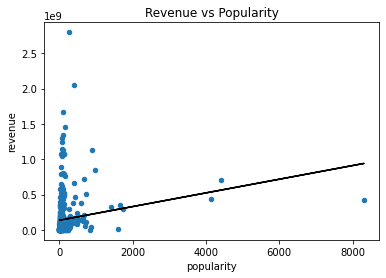

In [108]:
# Minor cleaning, remove movies with any 0s (generally these are unreleased movies)
moviesDF = moviesDF.loc[(moviesDF!=0).all(axis=1)]

# Plot popularity against revenue
ax1 = moviesDF.plot.scatter(x='popularity', y='revenue')
ax1.set_title("Revenue vs Popularity")

# Linear regression on popularity and revenue
popularityCol = moviesDF.loc[:, 'popularity']
revenueCol = moviesDF.loc[:, 'revenue']

m, b = np.polyfit(popularityCol, revenueCol, deg=1)

# Plot regression line
ax1.plot(popularityCol, m*popularityCol + b, color="black")

moviesDF


-- Log Transformation, note that interpretation of coefficients becomes %'s --

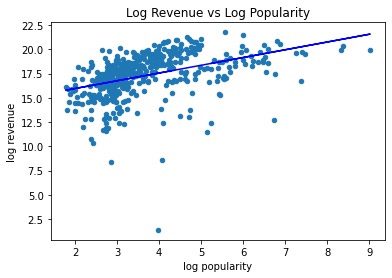

In [111]:
popularityColLog = [np.log(x) for x in popularityCol]
revenueColLog = [np.log(x) for x in revenueCol]

moviesDF['log popularity'] = popularityColLog
moviesDF['log revenue'] = revenueColLog

ax2 = moviesDF.plot.scatter(x='log popularity', y='log revenue')
ax2.set_title("Log Revenue vs Log Popularity")

popularityColLog = moviesDF.loc[:, 'log popularity']
revenueColLog = moviesDF.loc[:, 'log revenue']

m, b = np.polyfit(popularityColLog, revenueColLog, deg=1)
ax2.plot(popularityColLog, m*popularityColLog + b, color="blue")

In [71]:
# Reads covid19 worldwide cases csv file
cases_COVID = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths_COVID = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

# Aggregating data as we will focus on just aggregate information by date
cases_COVID.drop(columns=['Province/State','Country/Region', 'Lat', 'Long'], inplace=True)
deaths_COVID.drop(columns=['Province/State','Country/Region', 'Lat', 'Long'], inplace=True)

cases_COVID_agg = cases_COVID.sum(axis=0)
deaths_COVID_agg = deaths_COVID.sum(axis=0)

# Calculate daily new cases & deaths
cases_new = cases_COVID_agg.copy()
deaths_new = deaths_COVID_agg.copy()

covid_DF = pd.concat([cases_COVID_agg, cases_new, deaths_COVID_agg, deaths_new], axis=1)
covid_DF.columns = ['Cumulative Cases', 'Daily Confirmed Cases', 'Cumulative Deaths', 'Daily COVID Deaths']
covid_DF.reset_index(inplace=True)

for i in range(1, len(covid_DF)):
    covid_DF.loc[i,'Daily Confirmed Cases'] = covid_DF.loc[i,'Cumulative Cases'] - covid_DF.loc[i-1,'Cumulative Cases']
    covid_DF.loc[i,'Daily COVID Deaths'] = covid_DF.loc[i,'Cumulative Deaths'] - covid_DF.loc[i-1,'Cumulative Deaths']

covid_DF.set_index('index', inplace=True)
covid_DF


,Cumulative Cases,Daily Confirmed Cases,Cumulative Deaths,Daily COVID Deaths
index,,,,
1/22/20,557,557,17,17
1/23/20,655,98,18,1
1/24/20,941,286,26,8
1/25/20,1434,493,42,16
1/26/20,2118,684,56,14
...,...,...,...,...
12/9/21,268558598,724257,5287902,8700
12/10/21,269250556,691958,5296051,8149
12/11/21,269739121,488565,5301760,5709
